<a href="https://colab.research.google.com/github/ErikMayerPSU/AuroraNSL_2024/blob/main/Code/viewline/viewline_test_2025_1102_1200.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

View Lines

Based on binary_classification_2024_0627_a0935, https://github.com/ErikMayerPSU/AuroraNSL_2024/blob/main/Code/binary_classification_development/binary_classification_2024_0627_a0935.ipynb

In [199]:
import logging; logging.basicConfig(level=logging.INFO)
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

import pandas as pd

import numpy as np

plt.rcParams['font.size'] = 12
plt.rcParams['axes.linewidth'] = 1

Read data from St Patrick's Day Eflux (OP-13 output) file on GitHub (see File_reading_2024_0623_a0607.ipynb)

In [200]:
# OP-13 data

df_eflux = pd.read_csv(r"https://raw.githubusercontent.com/ErikMayerPSU/AuroraNSL_2024/main/data/St%20patrick's%20day%202015/Eflux/20150318_0200UT_Eflux_e%2Call.txt", header=None, skiprows=1, nrows=7680, sep='\s+', on_bad_lines='skip')

# Define new headers
eflux_headers = ["MLT", "ML", "[mW m^-2]"]

# Set the column headers
df_eflux.columns = eflux_headers

df_eflux

,MLT,ML,[mW m^-2]
0,0.00,50.0,0.009205
1,0.00,50.5,0.009303
2,0.00,51.0,0.005775
3,0.00,51.5,0.020590
4,0.00,52.0,0.000387
...,...,...,...
7675,23.75,87.5,0.023140
7676,23.75,88.0,0.022190
7677,23.75,88.5,0.023080
7678,23.75,89.0,0.016270


Add viewline column

In [201]:
#add a column for the equatorial boundry (EB) and viewline
df_eflux["EB"] = "0"
df_eflux["VL"] = "0"

#apply viewline equation to OP-13 data
for i in range(96):
  #j = df_eflux.loc[(df_eflux["MLT"] == i/4) & (df_eflux["[mW m^-2]"] >=1)].index[0]
  #df_eflux.loc[j,"EB"]=1
  #df_eflux.loc[j-8,"VL"]=1
  # Select rows based on conditions
  selected_rows = df_eflux.loc[(df_eflux["MLT"] == i/4) & (df_eflux["[mW m^-2]"] >1)]

  # Check if the selection is empty
  if not selected_rows.empty:
    last_j = j
    j = selected_rows.index[0]
    df_eflux.loc[j,"EB"]=1
    df_eflux.loc[j-8,"VL"]=1

df_eflux.loc[df_eflux["[mW m^-2]"]>=1, "[mW m^-2]"] = 1
df_eflux.loc[df_eflux["[mW m^-2]"]<1, "[mW m^-2]"] = 0

df_eflux

,MLT,ML,[mW m^-2],EB,VL
0,0.00,50.0,0.0,0,0
1,0.00,50.5,0.0,0,0
2,0.00,51.0,0.0,0,0
3,0.00,51.5,0.0,0,0
4,0.00,52.0,0.0,0,0
...,...,...,...,...,...
7675,23.75,87.5,0.0,0,0
7676,23.75,88.0,0.0,0,0
7677,23.75,88.5,0.0,0,0
7678,23.75,89.0,0.0,0,0


Set values for Eflux > 1 = true and < 1 = false

In [202]:
array_eflux = df_eflux.to_numpy()
array_eflux

array_eflux_mag_coordinates = array_eflux[0:7680,0:2]
array_eflux_mag_coordinates
data = array_eflux_mag_coordinates
data

array_eflux_flux = array_eflux[0:7680,2:3]
#print(array_eflux_flux)
array_EB = array_eflux[0:7680,3:4]
#print(array_viewline)
array_VL = array_eflux[0:7680,4:5]
#print(array_viewline)

# Flatten to 1-D array
array_eflux_flux_flatten = array_eflux_flux.flatten(order = 'C')
print(array_eflux_flux_flatten)

array_EB_flatten = array_EB.flatten(order = 'C')
print(array_EB_flatten)

array_VL_flatten = array_VL.flatten(order = 'C')
print(array_VL_flatten)

[0.0 0.0 0.0 ... 0.0 0.0 0.0]
['0' '0' '0' ... '0' '0' '0']
['0' '0' '0' ... '0' '0' '0']


In [203]:
# Using aurora visibility threshold = 1
labels = array_eflux_flux_flatten >= 1.0

EB_labels = array_EB_flatten == 1.0
VL_labels = array_VL_flatten == 1.0
# labels_b = np.sum(np.square(data_b-[.5,.5]),axis=1)<.16
print(labels)
print(EB_labels)
print(VL_labels)

[False False False ... False False False]
[False False False ... False False False]
[False False False ... False False False]


Plot the labelled data

Data for A:
[[0.0 50.0]
 [0.0 50.5]
 [0.0 51.0]
 ...
 [23.75 88.5]
 [23.75 89.0]
 [23.75 89.5]]
[False False False ... False False False]
Data for C:
[[0.0 50.0]
 [0.0 50.5]
 [0.0 51.0]
 ...
 [23.75 88.5]
 [23.75 89.0]
 [23.75 89.5]]
[False False False ... False False False]
Data for D:
[[0.0 50.0]
 [0.0 50.5]
 [0.0 51.0]
 ...
 [23.75 88.5]
 [23.75 89.0]
 [23.75 89.5]]
[False False False ... False False False]


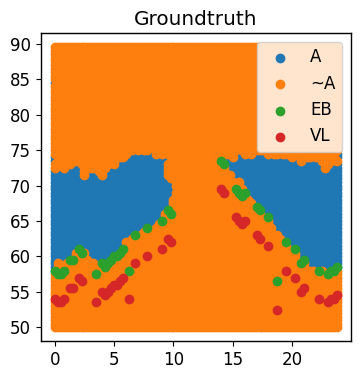

In [204]:
# Data for A from eflux file on GitHub
print("Data for A:")
print(data) # Added E.M.
# E.M. Changed from [.5,.5] to [.5,1] below:
# labels from eflux file (see above): labels = np.sum(np.square(data-[.5,.5]),axis=1)<.09
# This doesn't work. Error: label needs to be integer or boolean: labels = np.sum(np.square(data-[.5,.5]),axis=1)
print(labels) # Added E.M.

print("Data for C:")
print(data)
print(EB_labels)

print("Data for D:")
print(data)
print(VL_labels)

plt.figure(figsize=(4,4))
plt.scatter(data[labels][:,0],data[labels][:,1],label='A')
plt.scatter(data[np.logical_not(labels)][:,0],data[np.logical_not(labels)][:,1],label='~A')
plt.scatter(data[EB_labels][:,0],data[EB_labels][:,1],label='EB')
plt.scatter(data[VL_labels][:,0],data[VL_labels][:,1],label='VL')

#plt.scatter(data_b[labels_b][:,0],data_b[labels_b][:,1],label='B')
#plt.scatter(data_b[np.logical_not(labels_b)][:,0],data_b[np.logical_not(labels_b)][:,1],label='~B')

plt.title("Groundtruth")
plt.legend()
plt.show()